# Introduction to Summary Statistics

This week we're going to cover some basic approaches to summarising out datasets, as well as some core concepts in terms of what our data set actually represents, and in turn how that effects what we can say about the statistics we report. 

Our problem broadly is even with the dataset we will look at (which is in terms of data science, quite small), it quickly becomes impossible to accurately get an idea for what we can learn from the data by simply **looking at every value**. Even techniques which may have served us well in the past such as **plotting** can quickly become hard to draw precise conclusions from, especially when comparing **multiple subgroups**.

We'll see what stats we can use to help us scalably gain some insights, what they might tell us, what they might miss, and what they might be misrepresentative of. 

### The Dataset 

First we're going to check out a dataset of **1000 musical tracks**, each representative of **one of 10 musical genres**. 

The version I am using was from [this Kaggle page](https://www.kaggle.com/insiyeah/musicfeatures), although they credit [Marsyas (Music Analysis, Retrieval and Synthesis for Audio Signals)](http://marsyas.info/) for the dataset. 

Essentially what we have is some audio features taken over the 30 second excerpts, telling us various things about the music ranging from the musical (``tempo`` and ``beats``) to the signal processing (``spectral_centroid`` and ``mfcc``). 

The intention is to use this dataset and these features to **train a classifier** to identify music genre, given an audio file that has been **pre-processed** to get these features. In order to do this, and to deal with potentially **different length audio tracks** (I imagine?), the values present are acutally **means over the whole track**. 

We're going to take a look at 
* What we can tell about each genre of music given these stats


* How much confidence we can have in them


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
df1 = pd.read_csv("data/tiktok_music/TikTok_songs_2019.csv")
df2 = pd.read_csv("data/tiktok_music/TikTok_songs_2020.csv")
df3 = pd.read_csv("data/tiktok_music/TikTok_songs_2021.csv")
df4 = pd.read_csv("data/tiktok_music/TikTok_songs_2022.csv")
df1.head()

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,Shake It,Metro Station,53,Metro Station,68,0.618,0.955,-3.836,1,4,0.0798,0.00221,0.000003,0.486,0.790,150.034,4,179947
1,Chinese New Year,SALES,61,SALES - EP,53,0.744,0.845,-7.422,0,4,0.2530,0.75900,0.232000,0.100,0.749,75.221,4,160000
2,Baby I'm Yours,Breakbot,57,By Your Side,69,0.829,0.792,-3.755,0,2,0.0668,0.72600,0.000006,0.122,0.758,118.050,4,215507
3,The Git Up,Blanco Brown,60,The Git Up,2,0.847,0.678,-8.635,1,9,0.1090,0.06690,0.000000,0.274,0.811,97.984,4,200594
4,Say Hey (I Love You),Michael Franti & Spearhead,58,All Rebel Rockers,0,0.738,0.983,-4.374,0,5,0.0855,0.03800,0.000006,0.183,0.957,92.998,4,235760


In [43]:
# Add a column for year to df
df1 = df1.assign(Year=2019)
df2 = df2.assign(Year=2020)
df3 = df3.assign(Year=2021)
df4 = df4.assign(Year=2022)


In [44]:
df = pd.concat([df1, df2, df3, df4], axis=0)  # Stack along the columns
df


,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,Year
0,Shake It,Metro Station,53,Metro Station,68,0.618,0.955,-3.836,1,4,0.0798,0.002210,0.000003,0.4860,0.790,150.034,4,179947,2019
1,Chinese New Year,SALES,61,SALES - EP,53,0.744,0.845,-7.422,0,4,0.2530,0.759000,0.232000,0.1000,0.749,75.221,4,160000,2019
2,Baby I'm Yours,Breakbot,57,By Your Side,69,0.829,0.792,-3.755,0,2,0.0668,0.726000,0.000006,0.1220,0.758,118.050,4,215507,2019
3,The Git Up,Blanco Brown,60,The Git Up,2,0.847,0.678,-8.635,1,9,0.1090,0.066900,0.000000,0.2740,0.811,97.984,4,200594,2019
4,Say Hey (I Love You),Michael Franti & Spearhead,58,All Rebel Rockers,0,0.738,0.983,-4.374,0,5,0.0855,0.038000,0.000006,0.1830,0.957,92.998,4,235760,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,The Less I Know The Better,Tame Impala,78,Currents,84,0.640,0.740,-4.083,1,4,0.0284,0.011500,0.006780,0.1670,0.785,116.879,4,216320,2022
259,Dandelions,Ruth B.,75,Safe Haven,90,0.609,0.692,-2.958,1,1,0.0259,0.015700,0.000000,0.0864,0.454,116.959,3,233720,2022
260,Jimmy Cooks (feat. 21 Savage),Drake,95,"Honestly, Nevermind",92,0.529,0.673,-4.711,1,0,0.1750,0.000307,0.000002,0.0930,0.366,165.921,4,218365,2022
261,Good Looking,Suki Waterhouse,64,Good Looking,80,0.377,0.558,-9.076,1,4,0.0299,0.078900,0.000342,0.1250,0.267,149.971,3,214800,2022


I found that the same track_name could appear on the hit list in different years, so there were a lot of problems indexing the data behind it, to the point that the zscore calculation could not bring the data into the df, due to the fact that the same song creates different zscores in different years, so I replaced the trackname with a non-repeating year_serial number in the pattern to avoid this problem.

In [45]:
# Add numerical identifiers to "track_name" based on the values of "Year"
year_count = df['Year'].groupby(df['Year']).cumcount() + 1
df['Num'] = df['Year'].astype(str) + '.' + (year_count.astype(str).str.zfill(5))

# Print the modified DataFrame
df


,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,Year,Num
0,Shake It,Metro Station,53,Metro Station,68,0.618,0.955,-3.836,1,4,0.0798,0.002210,0.000003,0.4860,0.790,150.034,4,179947,2019,2019.00001
1,Chinese New Year,SALES,61,SALES - EP,53,0.744,0.845,-7.422,0,4,0.2530,0.759000,0.232000,0.1000,0.749,75.221,4,160000,2019,2019.00002
2,Baby I'm Yours,Breakbot,57,By Your Side,69,0.829,0.792,-3.755,0,2,0.0668,0.726000,0.000006,0.1220,0.758,118.050,4,215507,2019,2019.00003
3,The Git Up,Blanco Brown,60,The Git Up,2,0.847,0.678,-8.635,1,9,0.1090,0.066900,0.000000,0.2740,0.811,97.984,4,200594,2019,2019.00004
4,Say Hey (I Love You),Michael Franti & Spearhead,58,All Rebel Rockers,0,0.738,0.983,-4.374,0,5,0.0855,0.038000,0.000006,0.1830,0.957,92.998,4,235760,2019,2019.00005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,The Less I Know The Better,Tame Impala,78,Currents,84,0.640,0.740,-4.083,1,4,0.0284,0.011500,0.006780,0.1670,0.785,116.879,4,216320,2022,2022.00259
259,Dandelions,Ruth B.,75,Safe Haven,90,0.609,0.692,-2.958,1,1,0.0259,0.015700,0.000000,0.0864,0.454,116.959,3,233720,2022,2022.00260
260,Jimmy Cooks (feat. 21 Savage),Drake,95,"Honestly, Nevermind",92,0.529,0.673,-4.711,1,0,0.1750,0.000307,0.000002,0.0930,0.366,165.921,4,218365,2022,2022.00261
261,Good Looking,Suki Waterhouse,64,Good Looking,80,0.377,0.558,-9.076,1,4,0.0299,0.078900,0.000342,0.1250,0.267,149.971,3,214800,2022,2022.00262


In [46]:
df_backup = df
# Remove rows containing NaN values
df = df.dropna()
# Remove irrelevant columns
df = df.drop(columns=['artist_name', 'album','track_name'])


In [47]:
#10 unique labels
df["Year"].unique()

array([2019, 2020, 2021, 2022])

In [48]:
#count value of different year of top music
df["Year"].value_counts()

Year
2020    292
2022    263
2019    223
2021    190
Name: count, dtype: int64

In [49]:
#Using np.floor() to round all the values to nearest integer
tempos = np.floor(df["tempo"].values)

Text(0.5, 0, 'tempo(bpm)')

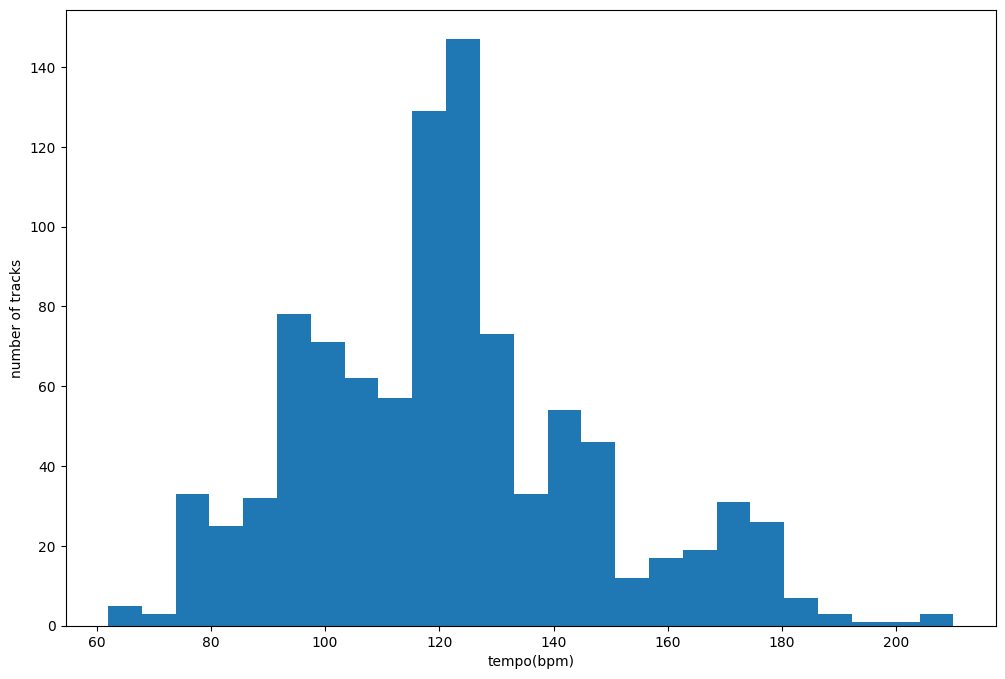

In [50]:
fig, ax = plt.subplots(figsize=(12,8)) 
number_of_bins = 25
#Plot histogram
h = ax.hist(tempos, bins=number_of_bins)
ax.set_ylabel("number of tracks")
ax.set_xlabel("tempo(bpm)")

In [51]:
from collections import Counter
#Mean
mean = df["tempo"].mean()
print(mean)
#Median
median = df["tempo"].median()
print(median)
#Mode
mode = Counter(tempos).most_common(1)[0][0]
print(mode)

122.3064152892562
121.364
120.0


### Individual Genres

In [52]:
Year = df["Year"].unique()
Year

array([2019, 2020, 2021, 2022])

In [53]:
np.linspace(0,1,len(Year))

array([0.        , 0.33333333, 0.66666667, 1.        ])

In [54]:
from matplotlib import colormaps

#Colour map gives use a continuous range of colours
colors = colormaps['tab20']

#List comprehension gets 10 colours from the colour map between 0 and 1 (e.g. 0, 0.1, 0.2, 0.3....)
colors_list = [colors(i) for i in np.linspace(0,1,5)]

colors_dict = {Year[i]:colors_list[i] for i in range(len(Year))}

In [55]:
grouped = df.groupby("Year")
print(grouped)

In [56]:
mean_tempos = grouped['tempo'].mean()


Text(0, 0.5, 'tempo (bpm)')

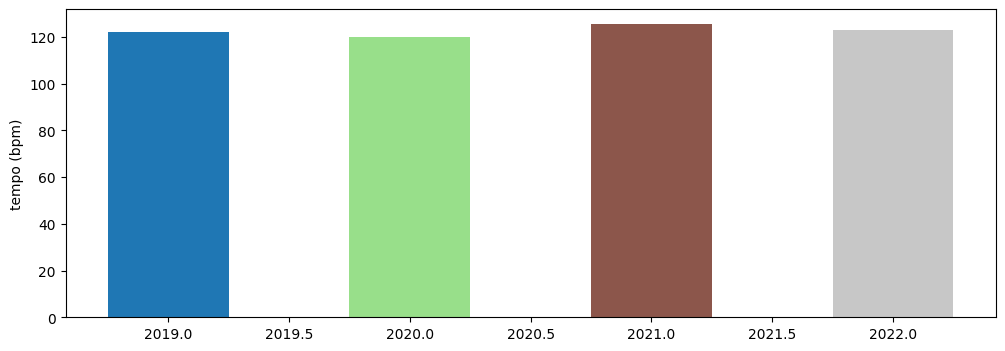

In [57]:

fig, ax = plt.subplots(figsize=(12,4))
ax.bar(Year,mean_tempos,0.5,color=colors_list)
ax.set_ylabel("tempo (bpm)")

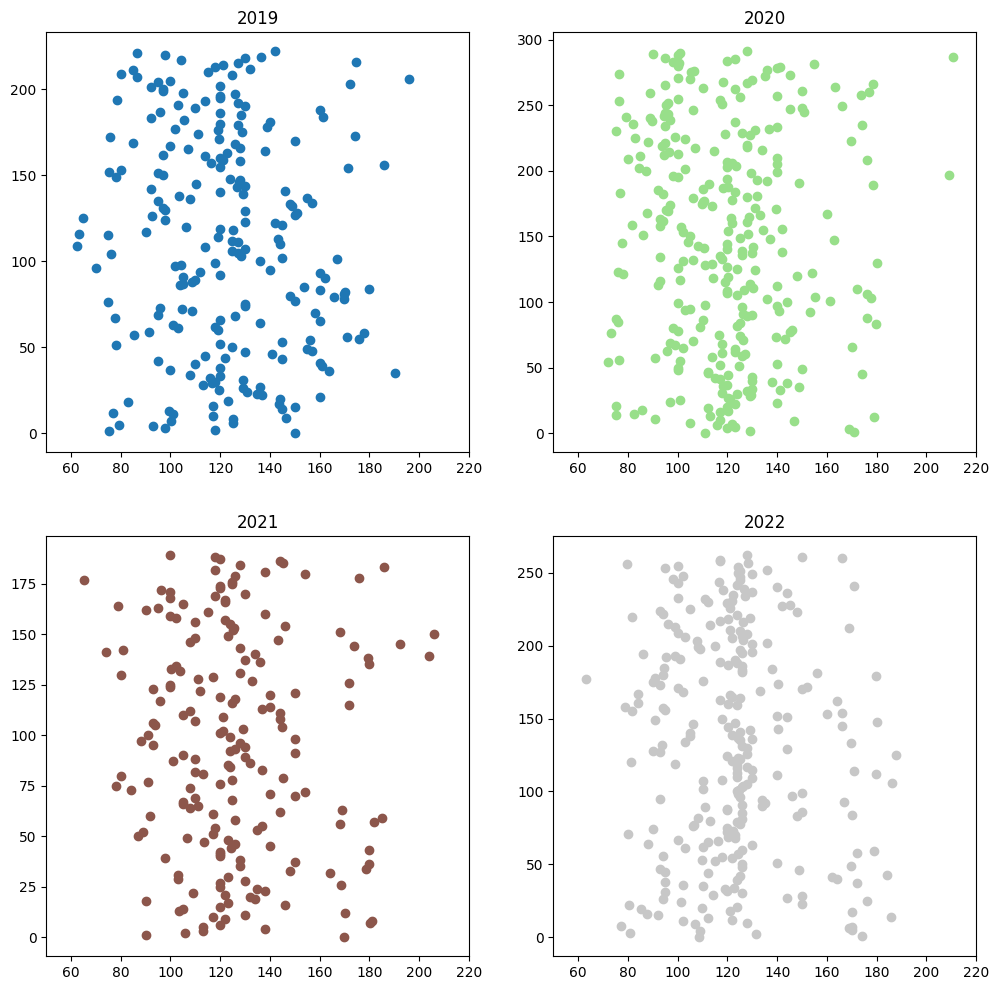

In [82]:
rows = 2
cols = 2
fig, ax = plt.subplots(rows, cols, figsize=(12,12))

for i,label in enumerate(Year):
    tempos = df[df["Year"]==label]["tempo"].values
    col = i%cols
    row = int(np.floor(i/cols))
    axis = ax[row,col]
    axis.plot(tempos,np.arange(len(tempos)), "o", color=colors_list[i], ms = 6)
    axis.set_title(label)
    #Set the bounds on the x axis so all graphs are comparable
    axis.set_xlim((50,220))

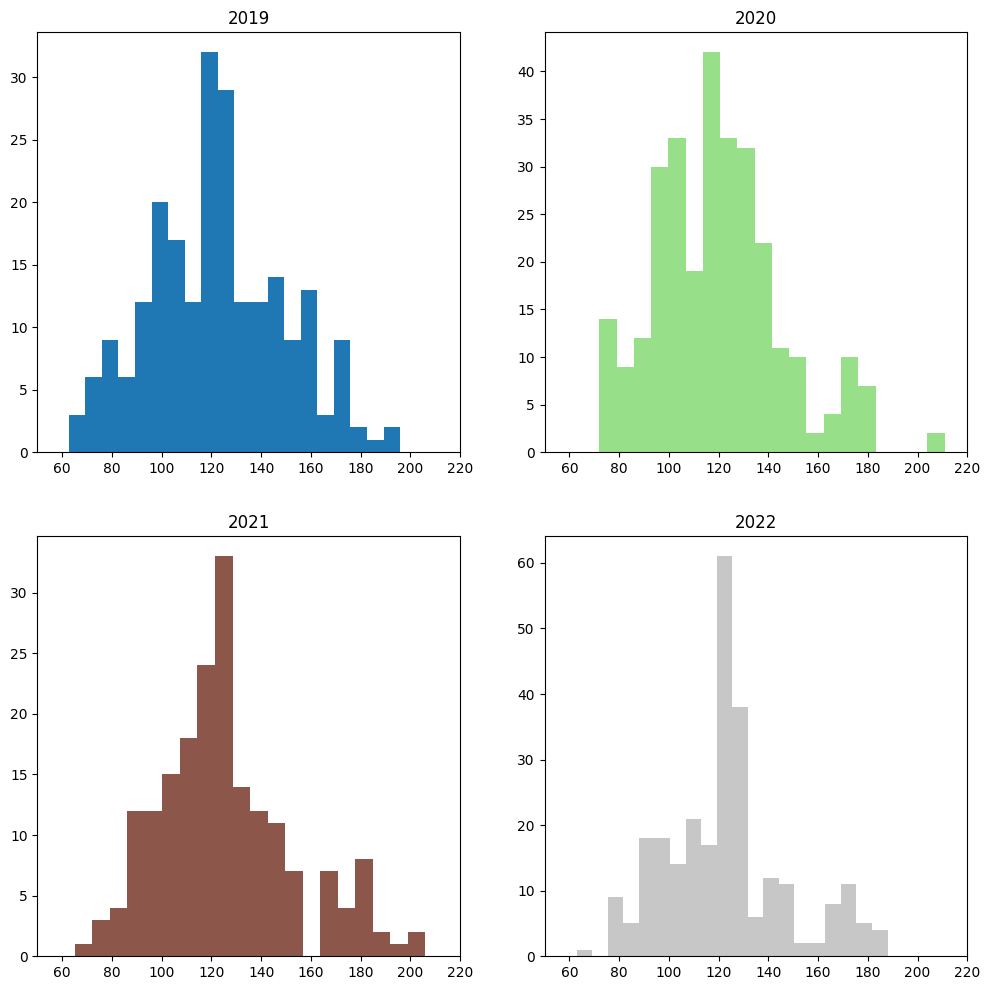

In [59]:
rows = 2
cols = 2
fig, ax = plt.subplots(rows, cols, figsize=(12,12))
colors = colormaps['tab20'];
for i,label in enumerate(df["Year"].unique()):
    tempos = df[df["Year"]==label]["tempo"].values
    col = i%cols
    row = int(np.floor(i/cols))
    axis = ax[row,col]
    number_of_bins = 20
    h = axis.hist(tempos, bins=number_of_bins,color=colors_list[i])
    axis.set_title(label)
    #Set the bounds on the x axis so all graphs are comparable
    axis.set_xlim((50,220))

In [60]:
y2019= df.loc[df["Year"] == 2019, "tempo"]
print(y2019)


0      150.034
1       75.221
2      118.050
3       97.984
4       92.998
        ...   
218    129.951
219    136.506
220     97.877
221     86.704
222    142.046
Name: tempo, Length: 223, dtype: float64


In [61]:
#Mean
mean = y2019.mean()
print(mean)
#Median
median = y2019.median()
print(median)

122.19657847533632
120.045


In [83]:
y2020= df.loc[df["Year"] == 2020, "tempo"]


In [84]:
#Mean
mean = y2020.mean()
print(mean)
#Median
median = y2020.median()
print(median)
#Most common 3 tempos
mode = Counter(np.floor(y2020)).most_common(3)[:3]
print(mode)

122.19657847533632
120.045
[(119.0, 12), (129.0, 10), (127.0, 7)]


### Measures of Variation

<BarContainer object of 4 artists>

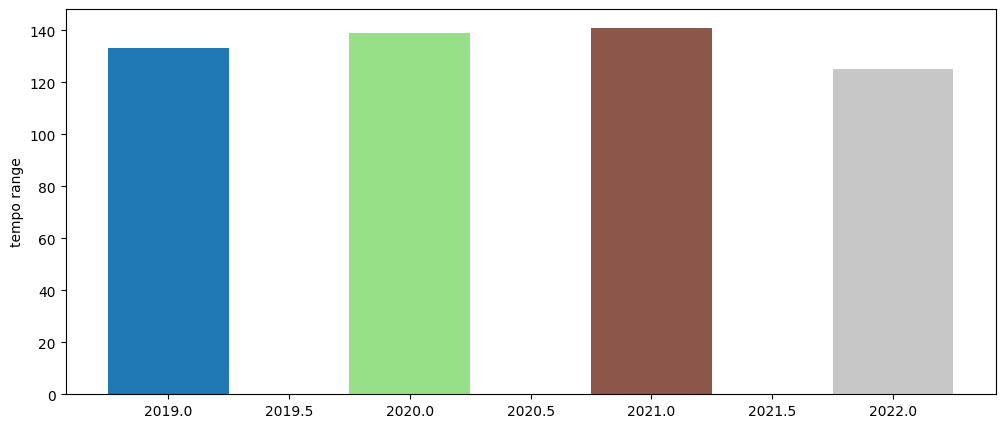

In [64]:
def tempo_range(x):
    return x["tempo"].max() - x["tempo"].min()

#Get range from grouped items
range_tempos = grouped.apply(tempo_range).sort_values()

#Plot
sorted_colors = [colors_dict[i] for i in range_tempos.index]
fig, ax = plt.subplots(figsize=(12,5))
ax.set_ylabel("tempo range")
ax.bar(range_tempos.index,range_tempos,0.5,color =sorted_colors)

<BarContainer object of 4 artists>

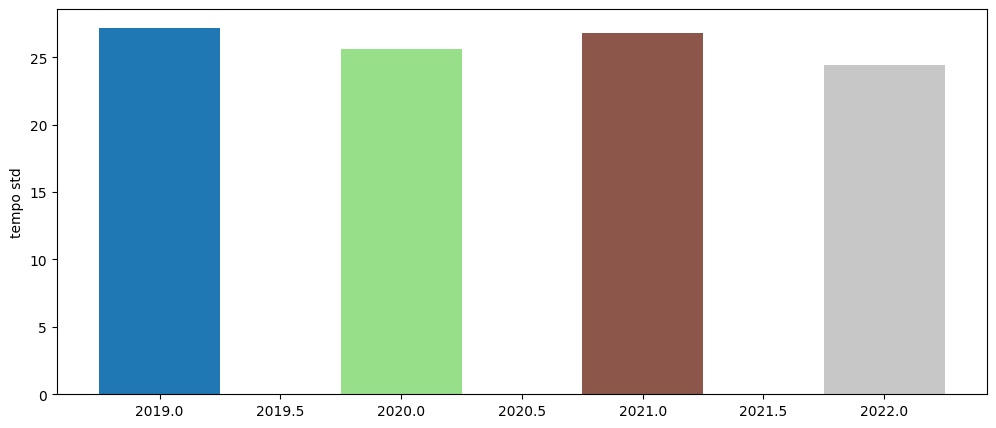

In [65]:
#Get standard deviation from grouped items
std_tempos = grouped.std().sort_values(by="tempo")

#Plot
sorted_colors = [colors_dict[i] for i in std_tempos.index]
fig, ax = plt.subplots(figsize=(12,5))
ax.set_ylabel("tempo std")
ax.bar(std_tempos.index,std_tempos["tempo"],0.5,color = sorted_colors)

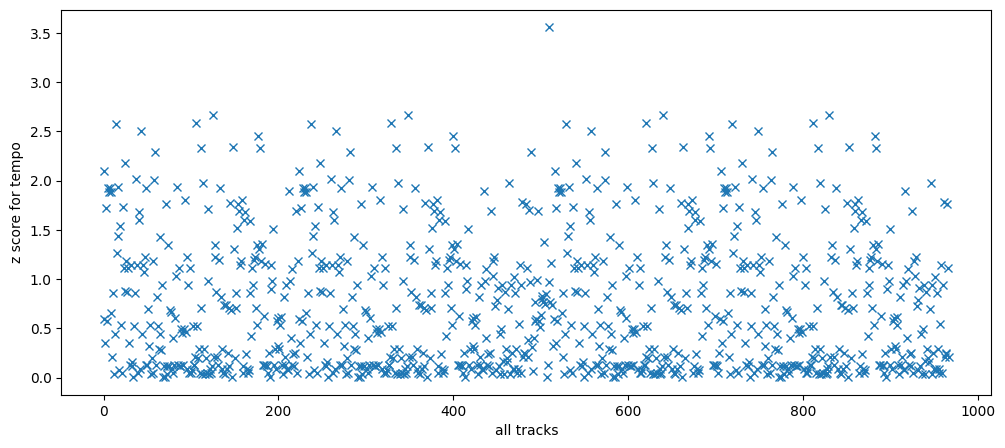

In [66]:
### Z Scores
for label in Year:
    mean = mean_tempos.loc[label]
    std = std_tempos.loc[label]["tempo"]
    group = df[df["Year"]==label]
    dist = np.abs(group["tempo"]-mean)/std
    #select rows from group, set zscore coloumn
    df.loc[group.index,"zscore"] = dist  

# print(df['zscore'])
fig, ax = plt.subplots(figsize=(12,5))
y = df["zscore"].values
ax.set_ylabel("z score for tempo")
ax.set_xlabel("all tracks")
ax.plot(y,"x")

### Sample Error

<BarContainer object of 4 artists>

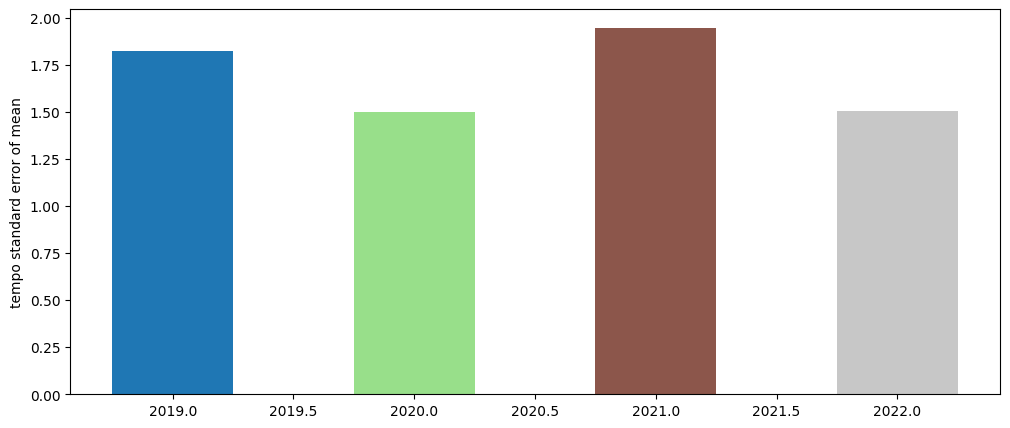

In [67]:
grouped = df.groupby("Year")
sem_tempos = grouped.sem().sort_values(by="tempo")
sorted_colors = [colors_dict[i] for i in sem_tempos.index]

fig, ax = plt.subplots(figsize=(12,5))
ax.set_ylabel("tempo standard error of mean")
ax.bar(sem_tempos.index,sem_tempos["tempo"],0.5,color = sorted_colors)

In [86]:
### Confidence intervals
confidence_intervals = []
num_samples = 200
z = 1.96
for label in Year:
    #Get mean for genre
    mean = mean_tempos.loc[label]
    
    #Get standard deviation for genre
    std = std_tempos.loc[label]["tempo"]
    
    #Get confidence range
    dist = z * (std / np.sqrt(num_samples))
    
    print(label, np.round(mean, 1), "+-", np.round(dist,3))
    confidence_intervals.append([dist,dist])

2019 122.2 +- 3.77
2020 119.8 +- 3.549
2021 125.5 +- 3.719
2022 122.9 +- 3.381


Text(0, 0.5, 'mean tempo with confidence intervals')

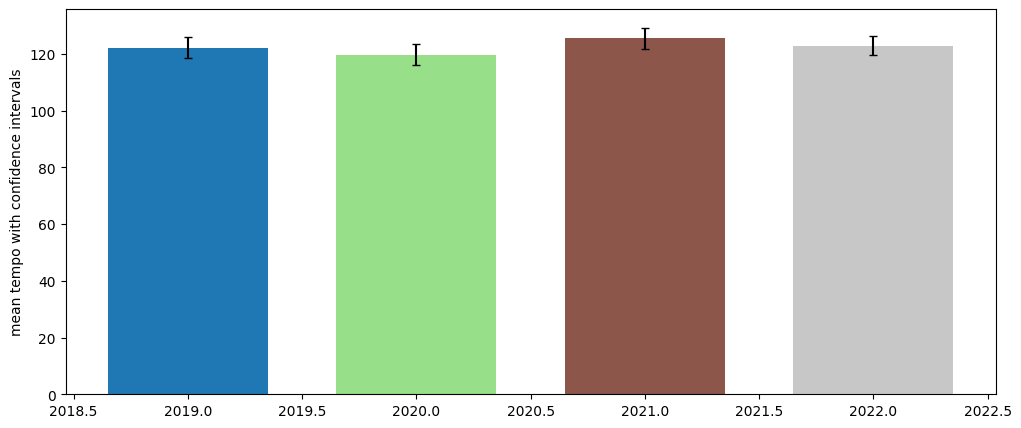

In [96]:
##Plot with confidence intervals on the mean tempo
fig, ax = plt.subplots(figsize=(12,5))
ax.bar(Year,mean_tempos,0.7,color=colors_list,yerr=np.array(confidence_intervals).T,align='center', capsize=3)
ax.set_ylabel("mean tempo with confidence intervals")

### Task 1

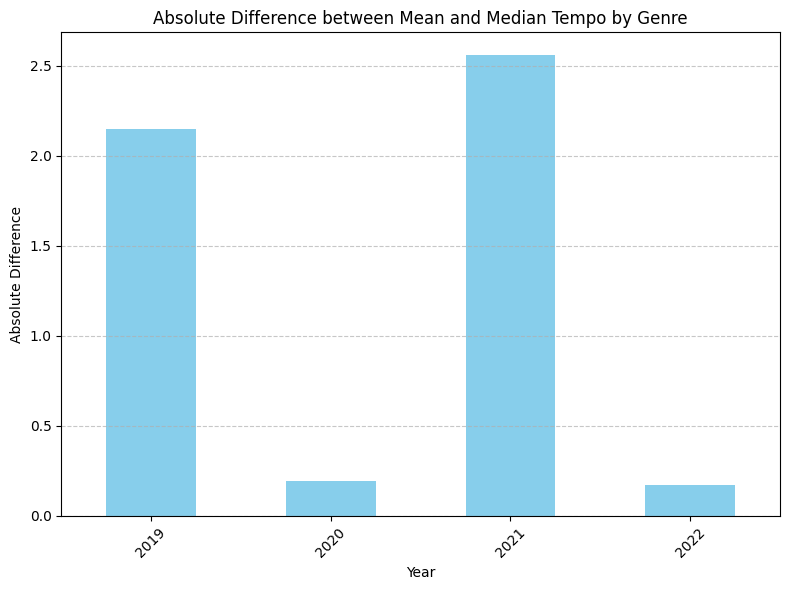

In [97]:
# Define a function to calculate absolute difference
def abs_diff(group):
    mean_tempo = group['tempo'].mean()
    median_tempo = group['tempo'].median()
    return abs(mean_tempo - median_tempo)

# Calculate absolute differences for each genre using groupby() and apply()
abs_diffs = df.groupby('Year').apply(abs_diff)

# Plot a bar chart
plt.figure(figsize=(8, 6))
abs_diffs.plot(kind='bar', color='skyblue')
plt.title('Absolute Difference between Mean and Median Tempo by Genre')
plt.xlabel('Year')
plt.ylabel('Absolute Difference')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The absolute difference between the mean and median rhythms is larger in 2019 and 2021, while the absolute difference is smaller in 2020 and 2022

### Task 2

In [98]:
# Print the filenames of tracks with a z value greater than 3
outliers = df[df['zscore'] > 3]['Num']
print(outliers.tolist())

['2020.00288']


In [99]:
# Find "trackname" in the line where the "Num" column is '2020.00288'.
track_name = df_backup.loc[df_backup['Num'] == '2020.00288', 'track_name'].values[0]
print(track_name)

Buttons


botton The Z score of this song is greater than 3 representing a larger difference in tempo compared to the entire dataset and may have a particular musical drum beat and rhythm.

### Task 3

In [100]:
#3.1
num_samplesodd_numbers = [i for i in np.arange(0,100) if i % 2 == 1 ]
num_samplesodd_numbers

[1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49,
 51,
 53,
 55,
 57,
 59,
 61,
 63,
 65,
 67,
 69,
 71,
 73,
 75,
 77,
 79,
 81,
 83,
 85,
 87,
 89,
 91,
 93,
 95,
 97,
 99]

In [101]:
#3.2
a = [i * 2 + 1 for i in np.arange(0,50)]
print(a)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]


In [102]:
#3.3 Sum the list of numbers from 1-i each time
a = [np.sum(np.arange(i)) for i in np.arange(2,12)]
print(a)

[1, 3, 6, 10, 15, 21, 28, 36, 45, 55]


In [103]:
#3.4
a = np.random.random(100)
#Use in place conditional 
a = [1 if i > 0.5 else 0 for i in a]
print(a)

[0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1]


### Task 4

In [104]:
### Confidence intervals
confidence_intervals = []
# num_samples used to be 100
# out put
# 2019 122.2 +- 5.331
# 2020 119.8 +- 5.019
# 2021 125.5 +- 5.259
# 2022 122.9 +- 4.782
num_samples = 200
z = 1.96
for label in Year:
    #Get mean for genre
    mean = mean_tempos.loc[label]
    
    #Get standard deviation for genre
    std = std_tempos.loc[label]["tempo"]
    
    #Get confidence range
    dist = z * (std / np.sqrt(num_samples))
    
    print(label, np.round(mean, 1), "+-", np.round(dist,3))
    confidence_intervals.append([dist,dist])

2019 122.2 +- 3.77
2020 119.8 +- 3.549
2021 125.5 +- 3.719
2022 122.9 +- 3.381


The width of the confidence interval decreases